# Chapter 3 Exercises

In [1]:
import os
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from IPython.display import SVG, display
from pandas.plotting import parallel_coordinates
from scipy import stats
from theano import shared, tensor

np.random.seed(seed=0)
az.style.use('arviz-darkgrid')

Bad val "cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])" on line #240
	"axes.prop_cycle    : cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])  # color cycle for plot lines
"
	in file "C:\Users\zhaolei\.matplotlib\matplotlibrc"
	Key axes.prop_cycle: 'cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])' is not a valid cycler construction: invalid syntax (<string>, line 1)


## Question 1
***

*Check the following definition of a probabilistic model. Identify the likelihood, the prior and the posterior:*

\begin{eqnarray}
y_i \text{~} Normal(\mu, \sigma) \newline
\mu \text{~} Normal(0,10) \newline
\sigma \text{~} \left|Normal(0,25) \right|
\end{eqnarray}

The priors in this model are:

\begin{eqnarray}
\mu \text{~} Normal(0,10) \newline
\sigma \text{~} \left|Normal(0,25) \right|
\end{eqnarray}


The likelihood in our model is  :
$$ Normal(\mu, \sigma)$$

And the posterior will be a distribution over $\mu$ and $\sigma$, but the posterior is not directly specified in the model (it is the result of Bayes formula!).

## Question 2
***

*For the model in exercise 1, how many parameters will the posterior have? In other words, how many dimensions will it have?*

There are two parameters in this model: $\mu$ and $\sigma$. So the posterior is 2-dimensional.

## Question 3
***

*Write Bayes' theorem for the model in exercise 1.*

Without expanding the denominator:

$$ p(\mu, \sigma | y) = \frac{\Pi_i\; \bigg( Normal(y| \mu, \sigma)\quad Normal(\mu|0,10)\quad HalfNormal(\sigma|0,25) \bigg) }{p(y)}  $$

Expanding the denominator:
$$ p(\mu, \sigma | y) = \frac{\Pi_i\; \bigg( Normal(y| \mu, \sigma)\quad Normal(\mu|0,10)\quad HalfNormal(\sigma|0,25) \bigg) }{\int \int\; \Pi_i\; \bigg( Normal(y| \mu, \sigma)\quad Normal(\mu|0,10)\quad HalfNormal(\sigma|0,25) \bigg)\; d\mu\; d\sigma} $$

## Question 4
***

*Check the following model. Identify the linear model and the likelihood. How many parameters does the posterior have?*

\begin{eqnarray}
y \text{~} Normal(\mu, \epsilon) \newline
\mu = \alpha + \beta x \newline
\alpha \text{~} Normal(0,10) \newline
\beta \text{~} Normal(0,1) \newline
\epsilon \text{~} \left|Normal(0,25) \right|
\end{eqnarray}

The linear model is:
\begin{eqnarray}
\mu = \alpha + \beta x
\end{eqnarray}


The likelihood in our model is:  
$$ Normal(\mu, \epsilon)$$

The posterior will have three parameters:

$$ \alpha, \beta, \epsilon $$

## Question 5
***

*For the model in exercise 1, assume that you have a dataset with 57 data points coming from a Gaussian with a mean of 4 and a standard deviation of 0.5. Using PyMC3, compute:*
- The posterior distribution
- The prior distribution
- The posterior predictive distribution
- The prior predictive distribution

*Tip: Besides `pm.sample()`, PyMC3 has other functions to compute samples.*

For this exercise we will generate 57 datapoints from a distribution of $Normal(4, 0.5)$:

In [3]:
data = stats.norm(4,.5).rvs(size=57)

In [4]:
with pm.Model() as model:
    mu = pm.Normal("mu", 0, 10)
    sd = pm.HalfNormal("sd", 25)
    y = pm.Normal("y,", mu, sd, observed=data)
    
    # Compute both prior, and prior predictive 计算先验预测
    prior_predictive = pm.sample_prior_predictive()
    
    # Compute posterior
    trace = pm.sample()
    
    # Compute posterior predictive 计算后验预测
    posterior_predictive = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 892.06it/s]


In [5]:
dataset = az.from_pymc3(trace=trace, posterior_predictive=posterior_predictive, prior=prior_predictive)
dataset

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> prior_predictive
	> observed_data

Let's plot the prior distributions to get a sense of what the Bayesian model's estimations without data

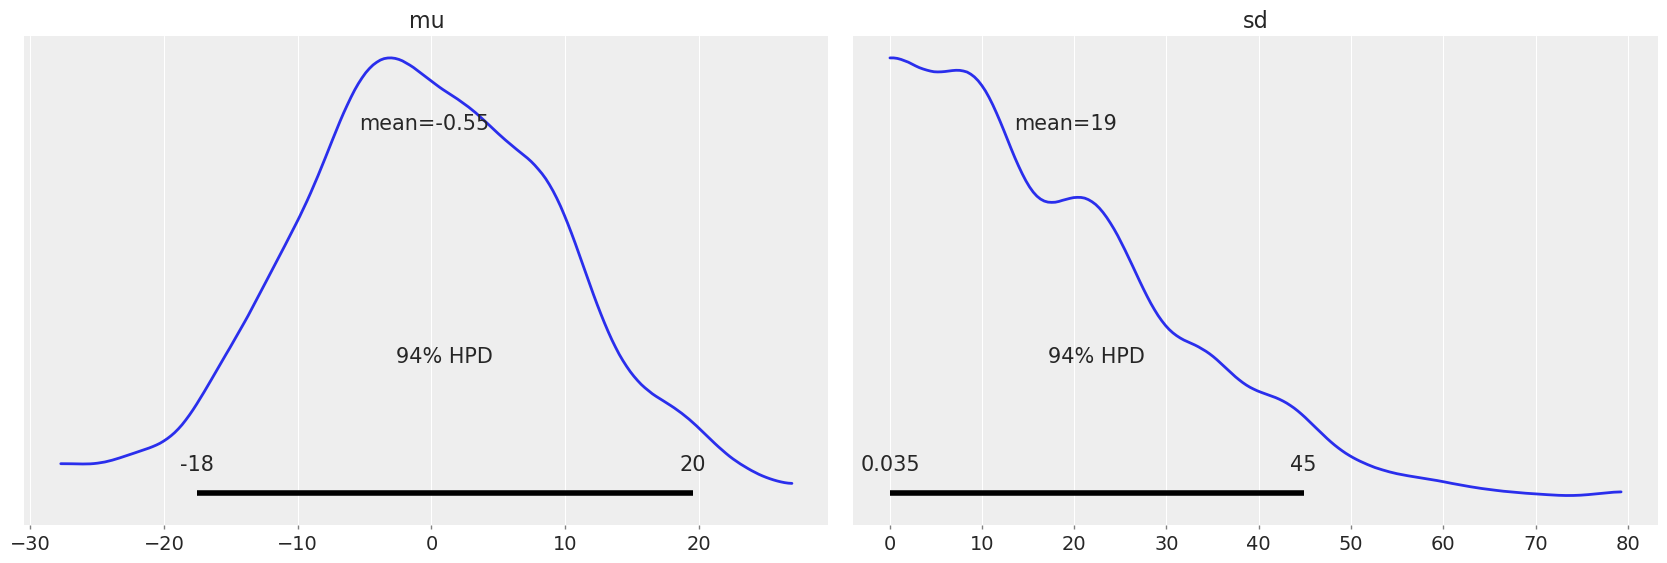

In [6]:
# The plot_posterior method can be used to plot priors as well
az.plot_posterior(dataset.prior, var_names=["mu", "sd"]);

Now let's plot the posterior, to check the distributions after update:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E606DFCB00>,
      dtype=object)

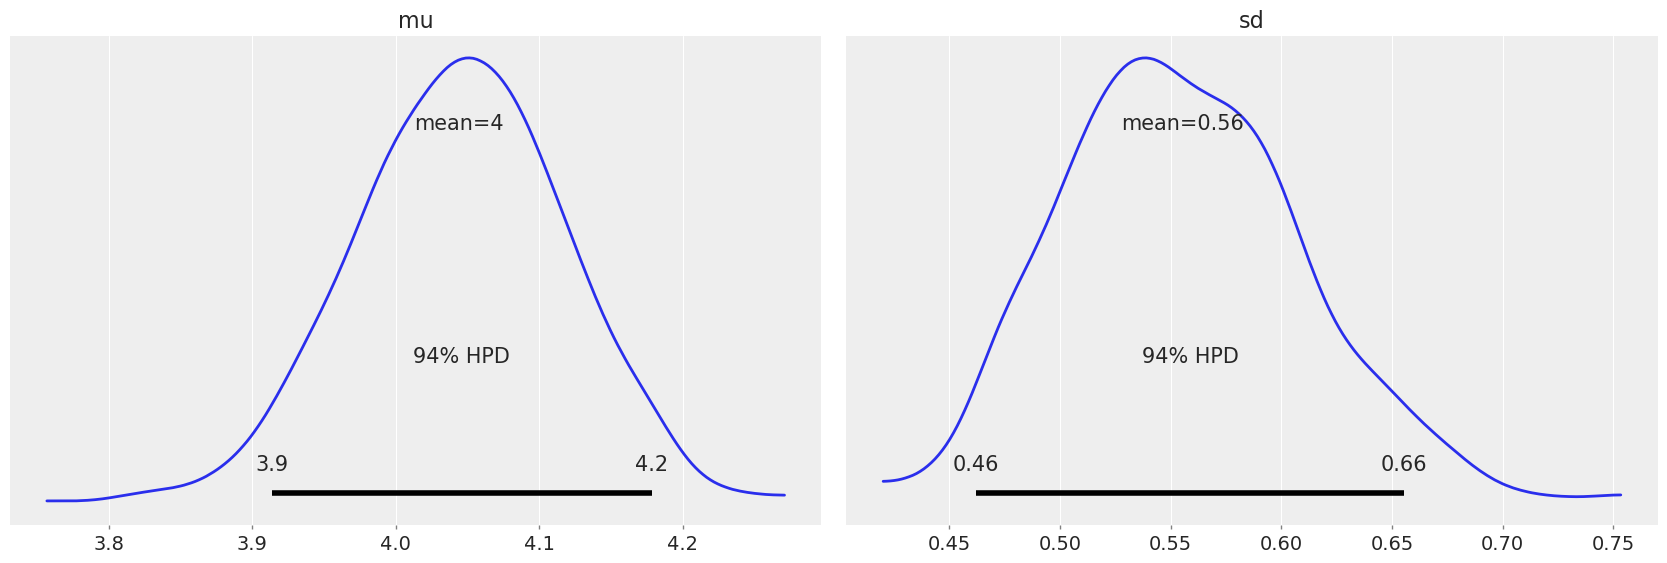

In [9]:
# Compare above plot to posterior distribution below, as well as to original parameters in distribution
az.plot_posterior(dataset.posterior, var_names=["mu", "sd"])
#az.plot_posterior(dataset)

The exercise also asks for the prior predictive values. We'll need to do some data manipulation to get the data into a format we can use with ArviZ:

In [13]:
dataset.prior_predictive

<xarray.Dataset>
Dimensions:   (chain: 1, draw: 500, y,_dim_0: 57)
Coordinates:
  * chain     (chain) int32 0
  * draw      (draw) int32 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * y,_dim_0  (y,_dim_0) int32 0 1 2 3 4 5 6 7 8 ... 48 49 50 51 52 53 54 55 56
Data variables:
    y,        (chain, draw, y,_dim_0) float64 3.668 2.872 ... -14.44 -4.972
    sd_log__  (chain, draw) float64 -0.6766 3.517 2.947 ... 4.373 1.556 3.518
Attributes:
    created_at:                 2020-04-25T08:12:28.357341
    inference_library:          pymc3
    inference_library_version:  3.8

Let's also plot the prior predictive values, we'll need to do some data manipulation to get the data into a format we can use with ArviZ

In [15]:
print(dataset.prior_predictive["y,"].values.shape)
prior_predictive = dataset.prior_predictive["y,"].values.flatten()
prior_predictive.shape

(1, 500, 57)


(28500,)

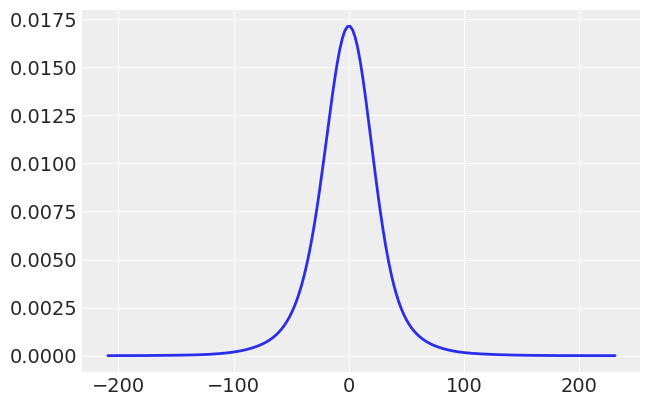

In [16]:
az.plot_kde(prior_predictive);

We can them compare this to the posterior predictive distribution:

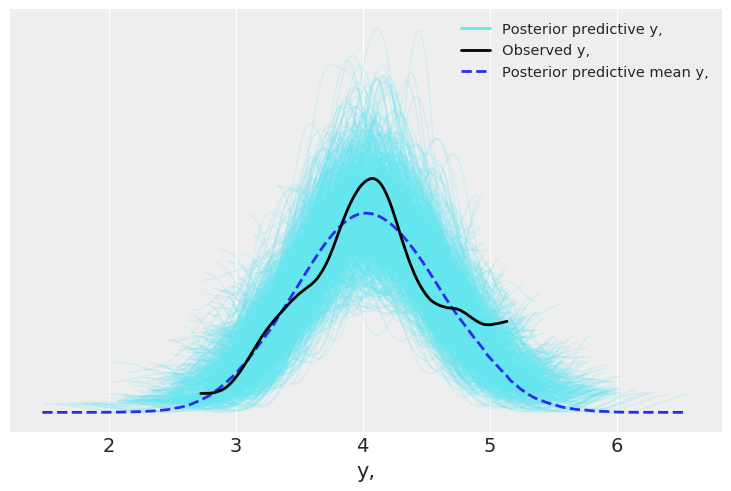

In [17]:
az.plot_ppc(dataset);

同样的方法也适用于后验预测

In [18]:
dataset.posterior_predictive

<xarray.Dataset>
Dimensions:   (chain: 2, draw: 500, y,_dim_0: 57)
Coordinates:
  * chain     (chain) int32 0 1
  * draw      (draw) int32 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * y,_dim_0  (y,_dim_0) int32 0 1 2 3 4 5 6 7 8 ... 48 49 50 51 52 53 54 55 56
Data variables:
    y,        (chain, draw, y,_dim_0) float64 3.502 4.739 4.924 ... 3.801 3.198
Attributes:
    created_at:                 2020-04-25T08:12:28.354349
    inference_library:          pymc3
    inference_library_version:  3.8

In [20]:
print(dataset.posterior_predictive["y,"].values.shape)
posterior_predictive = dataset.posterior_predictive["y,"].values.flatten()
posterior_predictive.shape

(2, 500, 57)


(57000,)

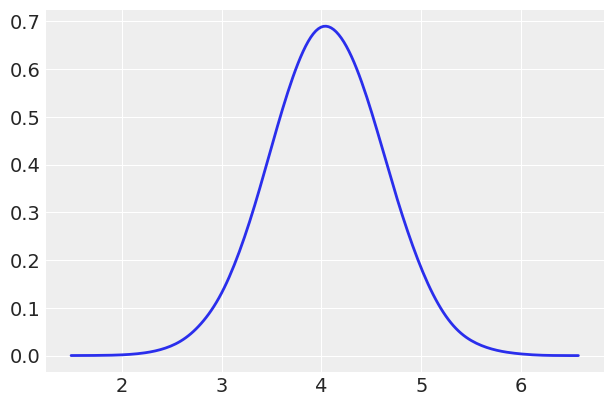

In [21]:
az.plot_kde(posterior_predictive);

## Question 6
***

*Execute `model_g` using NUTS (the default sampler) and then using Metropolis. Compare the results using ArviZ functions like `plot_trace` and `plot_pairs`. Center the variable $x$ and repeat the exercise. What conclusion can you draw from this?*

In [22]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

In [23]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

In [24]:
%%time
with model_g:
    trace_nuts_non_centered = pm.sample(draws=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 2000/2000 [00:14<00:00, 139.97draws/s]


Wall time: 37.2 s


In [25]:
nuts_non_centered_dataset = az.from_pymc3(trace=trace_nuts_non_centered)

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

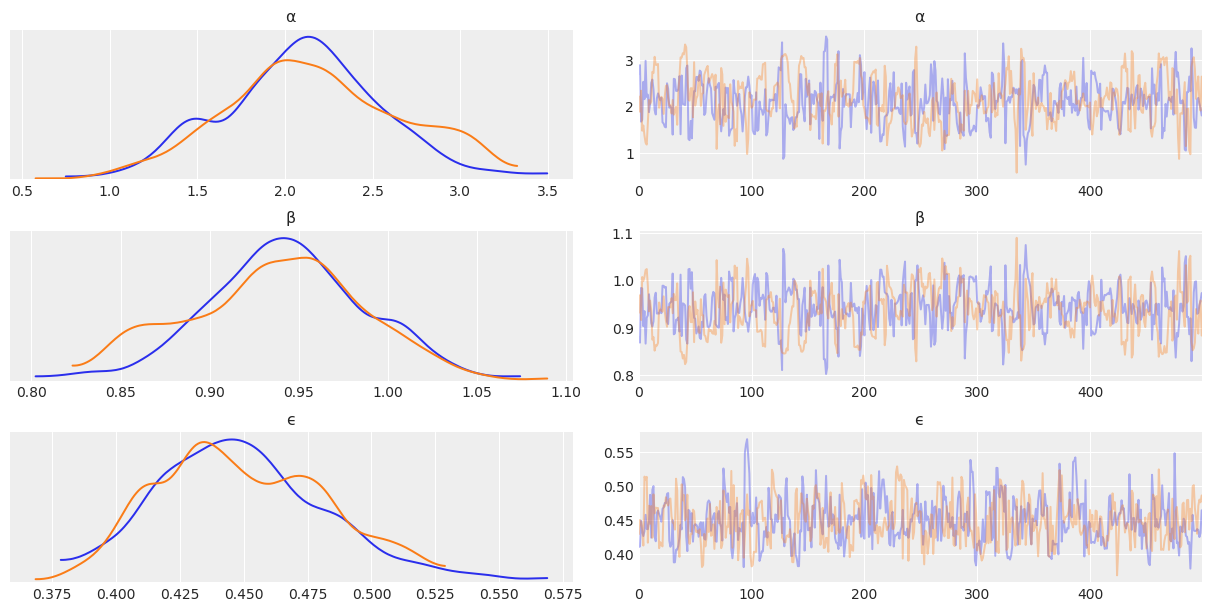

In [26]:
az.plot_trace(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ']);

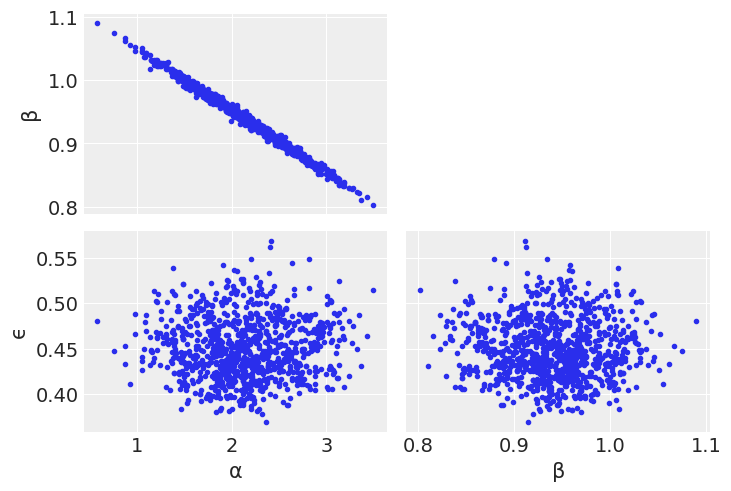

In [27]:
az.plot_pair(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ']);

In [28]:
%%time
with model_g:
    step = pm.Metropolis()
    trace_mh_non_centered = pm.sample(draws=500, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [β]
>Metropolis: [α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 2000/2000 [00:03<00:00, 526.75draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Wall time: 38.2 s


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

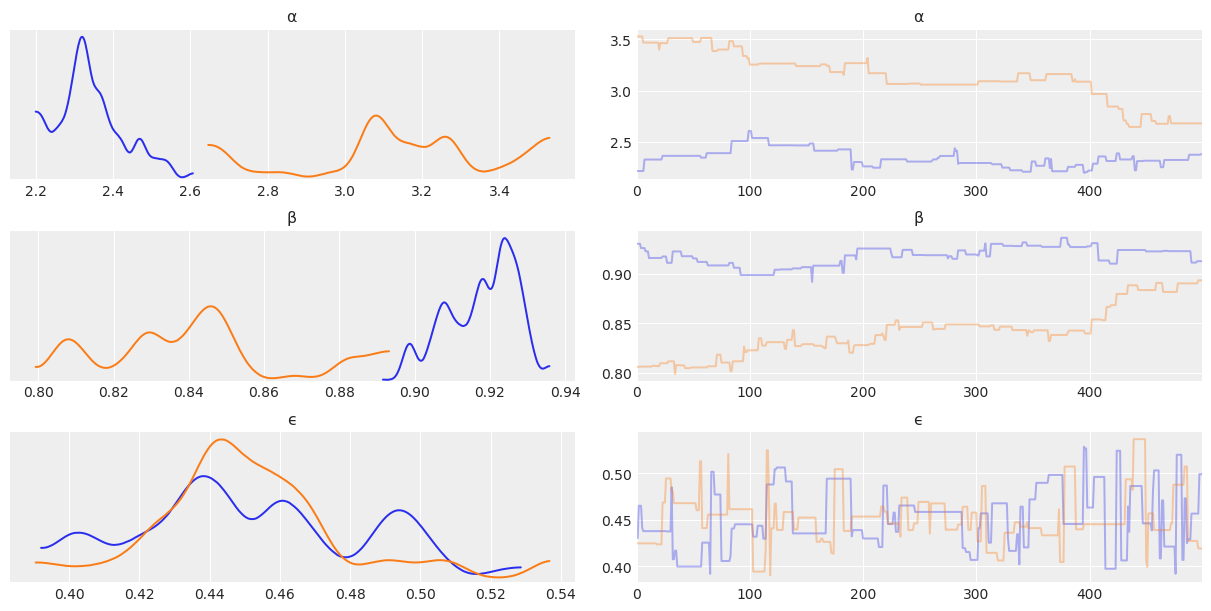

In [29]:
az.plot_trace(trace_mh_non_centered, var_names=['α', 'β', 'ϵ']);

In [30]:
az.summary(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,2.128,0.480,1.298,3.077,0.026,0.019,342.0,323.0,350.0,339.0,1.01
β,0.940,0.047,0.843,1.018,0.003,0.002,342.0,342.0,350.0,334.0,1.01
ϵ,0.449,0.033,0.394,0.514,0.002,0.001,391.0,390.0,392.0,453.0,1.00


In [31]:
az.summary(trace_mh_non_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,2.740,0.435,2.209,3.469,0.295,0.245,2.0,2.0,3.0,12.0,2.41
β,0.879,0.042,0.806,0.928,0.029,0.024,2.0,2.0,3.0,12.0,2.41
ϵ,0.452,0.030,0.400,0.507,0.003,0.002,110.0,110.0,106.0,75.0,1.02


Now let's standardize the variables and take samples again. We don't need to redefine the model, but we'll do so for clarities sake:

In [32]:
# standardize the data
x_centered = (x - x.mean())/x.std()
y_centered = (y - y.mean())/y.std()

In [33]:
with pm.Model() as model_g_centered:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x_centered)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_centered)  #xy都要标准化

In [34]:
%%time
with model_g_centered:
    trace_nuts_centered = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 2000/2000 [00:07<00:00, 266.23draws/s]


Wall time: 25.8 s


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

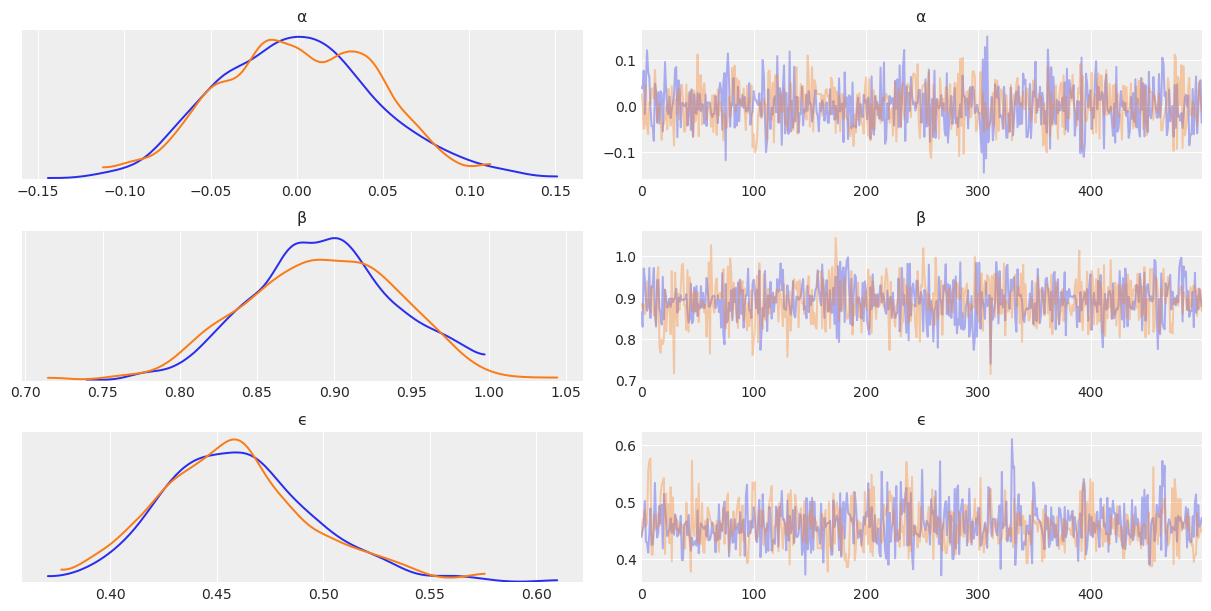

In [35]:
az.plot_trace(trace_nuts_centered, var_names=['α', 'β', 'ϵ']);

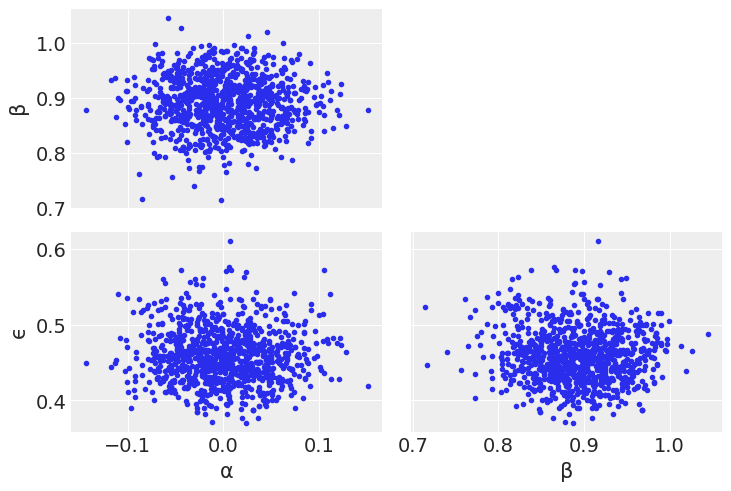

In [36]:
az.plot_pair(trace_nuts_centered, var_names=['α', 'β', 'ϵ']);

In [37]:
%%time
with model_g_centered:
    step = pm.Metropolis()
    trace_mh_centered = pm.sample(step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [β]
>Metropolis: [α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 2000/2000 [00:04<00:00, 494.05draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Wall time: 28 s


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E607215CC0>,
      dtype=object)

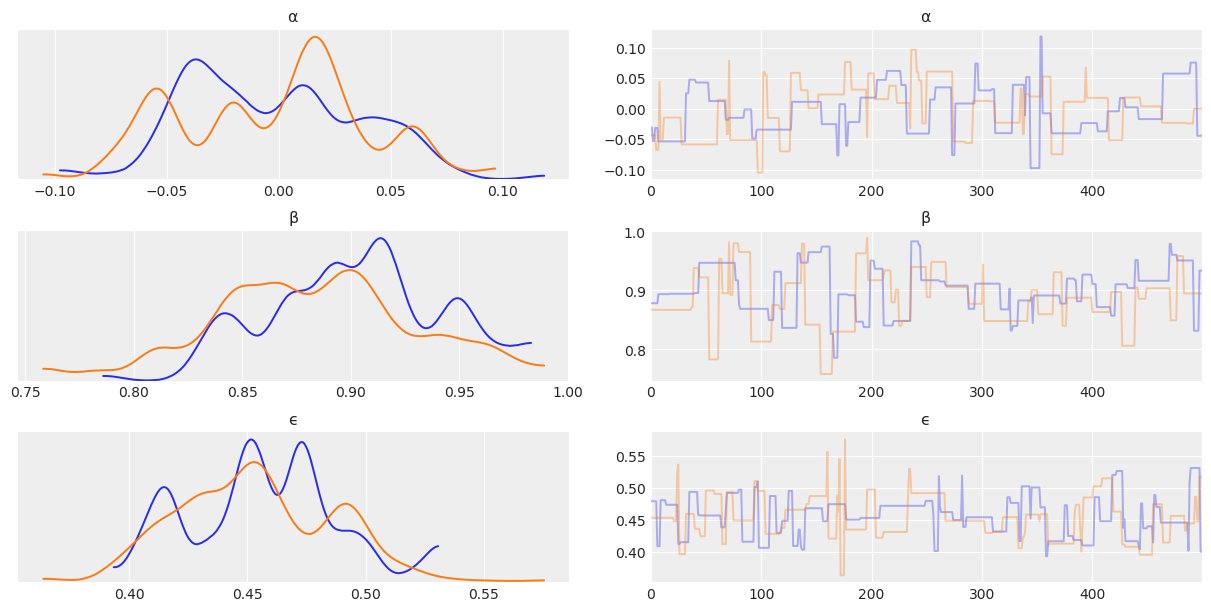

In [38]:
az.plot_trace(trace_mh_centered, var_names=['α', 'β', 'ϵ'])

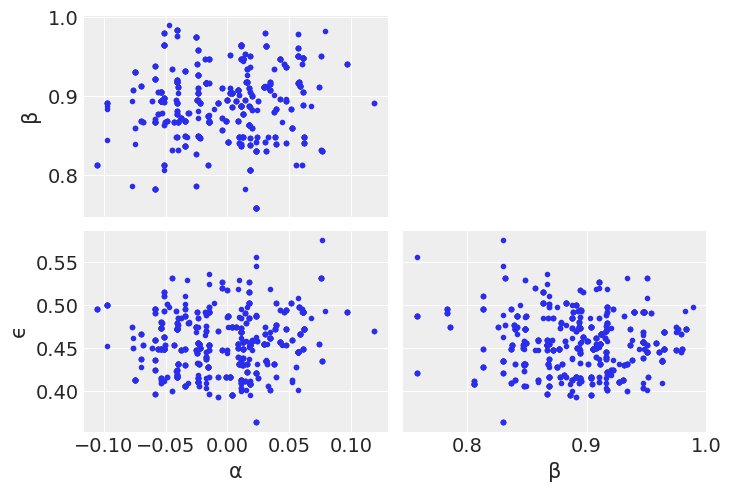

In [39]:
az.plot_pair(trace_mh_centered, var_names=['α', 'β', 'ϵ']);

In [40]:
az.summary(trace_nuts_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,0.000,0.046,-0.079,0.086,0.001,0.002,1016.0,358.0,1023.0,635.0,1.0
β,0.892,0.048,0.811,0.985,0.002,0.001,944.0,944.0,938.0,625.0,1.0
ϵ,0.459,0.036,0.394,0.528,0.001,0.001,868.0,834.0,930.0,577.0,1.0


In [41]:
az.summary(trace_mh_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,-0.003,0.040,-0.070,0.062,0.005,0.004,61.0,61.0,62.0,56.0,1.02
β,0.891,0.045,0.830,0.983,0.005,0.004,78.0,78.0,78.0,83.0,1.08
ϵ,0.455,0.032,0.396,0.502,0.003,0.002,120.0,120.0,120.0,146.0,1.01


Looking through the plots there's a couple things to note.

Metropolis Hastings is less effective at sampling than NUTS. This is indicated by:
 1. The Metropolis Hasting trace plots looking "square" when compared the NUTS traceplot. This is due to the sampler getting "stuck" at a value.与NUTS轨迹图相比，Metropolis Hasting轨迹图看起来“方形”。 这是由于采样器“卡住”了某个值。
 2. The kernel density estimates of each chain have "squiggly" topologies 每个链的内核密度估计具有“弯曲”的拓扑
 3. The effective number of samples for Non Centered Metropolis Hastings is 1  非中心Metropolis Hastings的有效样本数为1
 
One thing to note though is that Metropolis Hastings does sample faster than NUTS. While the results aren't great, credit is due where it's deserved!不过要注意的一件事是，Metropolis Hastings的采样速度比NUTS快。 虽然效果不佳，但值得应得的荣誉！好像实验结果也不是
 
Diving into the problem further, we can see that $\alpha$ and $\beta$ are linearly correlated. Metropolis Hastings does not sample well when toplogies have such shapes. We'll talk more about this in Chapter 8, but for now note how centering x helps somewhat with the Metropolis Hasting sampler, as centering decorrelates $\alpha$ and $\beta$ parameters.进一步分析该问题，我们可以看到$ \ alpha $和$ \ beta $是线性相关的。 当拓扑结构具有这种形状时，Metropolis Hastings无法很好地进行采样。 我们将在第8章中对此进行更多讨论，但是现在请注意居中x在Metropolis Hasting采样器上有什么帮助，因为居中将$ \ alpha $和$ \ beta $参数相关。

The biggest takeaway is the effectiveness of NUTS, regardless of topology in these two cases. This is not to say NUTS can handle anything you throw at it, there are some topologies that are hard, but by and large NUTS does quite well in many situations.无论这两种情况下的拓扑如何，最大的收获就是NUTS的有效性。 这并不是说NUTS可以处理您扔给它的任何东西，有些拓扑很难，但是总的来说NUTS在许多情况下都做得很好。

## Question 7
***

*Use the howell dataset to create a linear model of the weight ($x$) against the height ($y$). Exclude subjects that are younger than 18. Explain the results.*

Let's import the dataset and create a mask for people older than 18:

In [2]:
howell = pd.read_csv("../code/data/howell.csv", delimiter=";")
howell.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [3]:
age_18_mask = howell["age"] > 18

A good first step is before diving into statistics is to look at the data and ask if it make sense. In my experience taller people tend to weigh more than shorter people. Let's check the data to be sure.在深入研究统计数据之前，最好的第一步是查看数据并询问是否有意义。 以我的经验，高个子的人比矮个子的人体重更大。 让我们检查数据以确保。

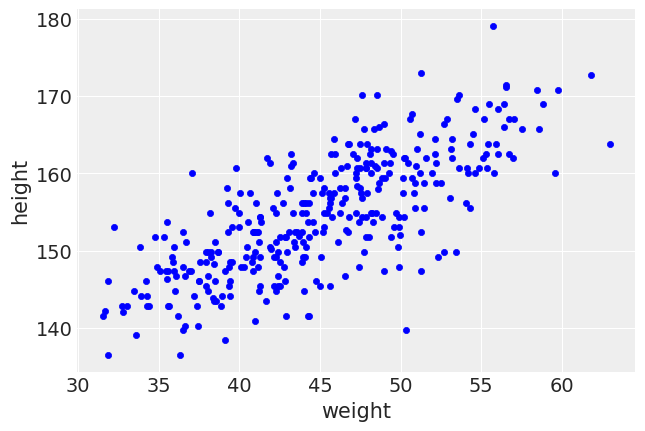

In [4]:
howell[age_18_mask].plot(kind="scatter", x="weight", y="height");

When looking at the plot above this is with consistent our expectations. As weight increases, height increases as well. From visual inspection, it looks like a linear fit with some noise is best. In this case we will assume constant variance. Let's create a model:
当看上面的图时，这符合我们的期望。 随着重量的增加，身高也随之增加。 从外观检查来看，看起来像线性拟合并带有一些噪声是最好的。 在这种情况下，我们将假设恒定方差。 让我们创建一个模型：

我们定义一个共享变量x_shared。 在模型拟合之后，我们将使用它来更改x变量的值（在本示例中为weight），而无需重新拟合模型

In [44]:
height = howell["height"]
weight = howell["weight"]
weigh1= weight[age_18_mask].values

In [45]:
with pm.Model() as over_18_heights:
    α = pm.Normal("α", sd=10)
    β = pm.Normal("β", sd=10)
    ϵ = pm.HalfNormal("ϵ", sd=10)
    
    weight_shared = pm.Data("weight_shared",weigh1)
    μ = pm.Deterministic("μ", α+β*weight_shared)
    
    height_pred = pm.Normal("height_pred", mu=μ, sd=ϵ, observed = height[age_18_mask])
    trace_over_18_heights = pm.sample(tune=2000,cores=1)
    ppc_over_18_heights = pm.sample_posterior_predictive(trace_over_18_heights, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α]
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 486.22it/s]


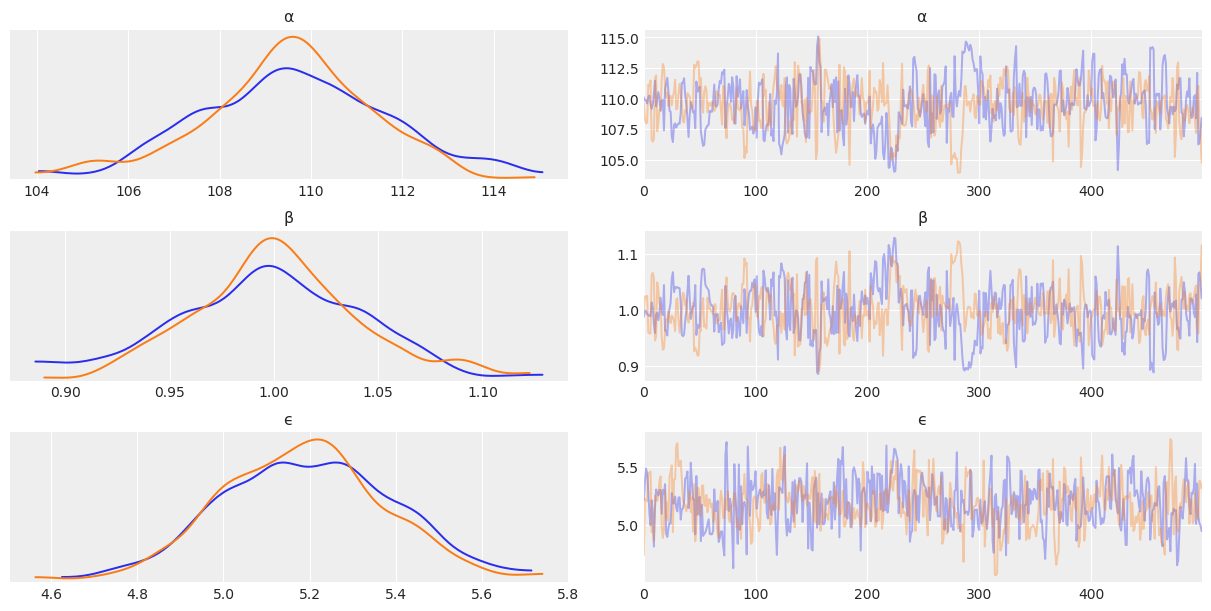

In [31]:
weight_shared.set_value(weight[age_18_mask].values)
az.plot_trace(trace_over_18_heights, var_names = ["α","β", "ϵ"]);

Looking at the traceplot it looks like the inference engine was able to explore the posterior adequately. Let's plot the regression and the hpd.查看跟踪图，看来推理引擎能够充分探究后验。 让我们绘制回归和hpd。

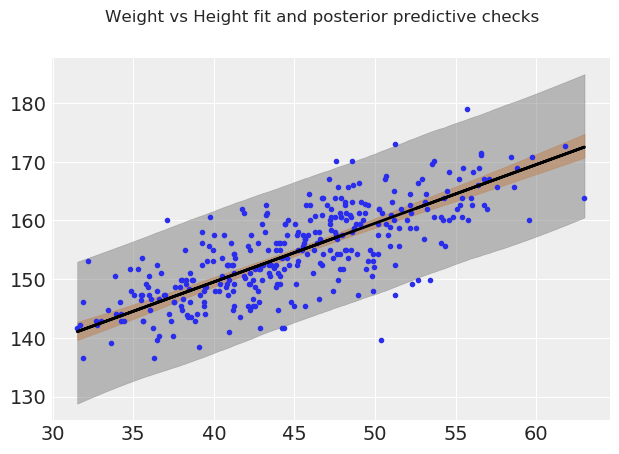

In [54]:
fig, ax = plt.subplots()

ax.plot(weight[age_18_mask], height[age_18_mask], "C0.")
μ_m = trace_over_18_heights["μ"].mean(0)
ϵ_m = trace_over_18_heights["ϵ"].mean()

ax.plot(weight[age_18_mask], μ_m, c="k")
az.plot_hpd(weight[age_18_mask], trace_over_18_heights["μ"], credible_interval=.98)
az.plot_hpd(weight[age_18_mask], ppc_over_18_heights["height_pred"], credible_interval=.98, color="gray")
fig.suptitle("Weight vs Height fit and posterior predictive checks");

From visual inspection the average parameters of the fit look quite good, and the 98% interval of the posterior predictive checks covers most of the distribution. Overall, it looks like a linear fit is great for height vs weight for people over 18!从外观检查来看，拟合的平均参数看起来非常好，并且后预测检查的98％间隔涵盖了大部分分布。 总体而言，看起来线性拟合非常适合18岁以上的人群身高vs体重！

## Question 8
***

*For four subjects, we get the weights (45.73, 65.8, 54.2, 32.59), but not their heights. Using the model from the previous exercise, predict the height for each subject, together with their 50% and 94% HPDs.*

*Tip 1: Check the [coal mining disaster example](https://docs.pymc.io/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters) in PyMC3's documentation.*

*Tip 2: Use shared variables.*

Using our previous fit, we can generate predictions for the height of people with various weights:

In [53]:
weights = (45.73, 65.8, 54.2, 32.59)
data1=np.linspace(30,70,500)

In [56]:
with over_18_heights:
    pm.set_data({"weight_shared": [65.8]})
#weight_shared.set_value([45.73])
#print(weight_shared.get_value())
    ppc = pm.sample_posterior_predictive(trace_over_18_heights, samples=2000)

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 629.97it/s]


In [57]:
ppc["height_pred"].shape

(2000, 346)

In [49]:
ppc_over_18_heights['height_pred'].shape

(2000, 346)

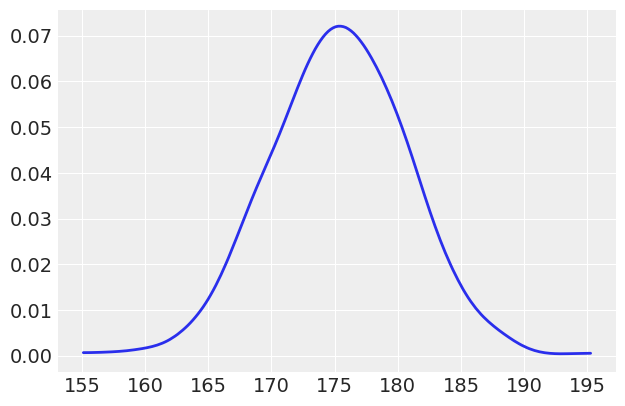

In [58]:
ppc_first_col = ppc["height_pred"][:,0]
az.plot_kde(ppc_first_col);

The reason we take the 0th column is that, in the current version of PyMC3, `pm.sample_ppc` returns an array of size $samples\; \times\; observed\; values$. This makes total sense when you want to do posterior predictive checks, as you want to check that the simulations/predictions have the  same size/shape as the observations. But when you just want to make predictions at values other that the input data, that restriction does not apply. In summary, I consider this a limitation of the current implementation of `pm.sample_ppc`.我们选择第0列的原因是，在当前版本的PyMC3中，pm.sample_ppc返回大小为𝑠𝑎𝑚𝑝𝑙𝑒𝑠×𝑜𝑏𝑠𝑒𝑟𝑣𝑒𝑑𝑣𝑎𝑙𝑢𝑒𝑠的数组。 当您要进行后验预测检查时，这很有意义，因为您想检查模拟/预测是否具有与观测值相同的大小/形状。 但是，当您只想对输入数据以外的值进行预测时，则不适用该限制。 总之，我认为这是对pm.sample_ppc当前实现的限制。

### $samples\; \times\; observed\; values$ 当样本量大于观察值时，将采用新的样本空间，比如样本=500时，(2000, 500)；当只输入一个值进行验证时，样本空间依然是(2000, 346)，那么第一个值index=0,就是我们需要的数据

with over_18_heights:
    weight_shared = shared(weight.values * 1.)
weight_shared.set_value([45.73])
print(weight_shared.get_value())

with over_18_heights:
    weight_shared = pm.Data("weight_shared",weigh1)
with over_18_heights:
    pm.set_data({"weight_shared": [65.8]})

## Question 9
***

*Repeat exercise 7, this time including those below 18 years old. Explain the results.*

Let's take a look at the data again, now without the age limit:

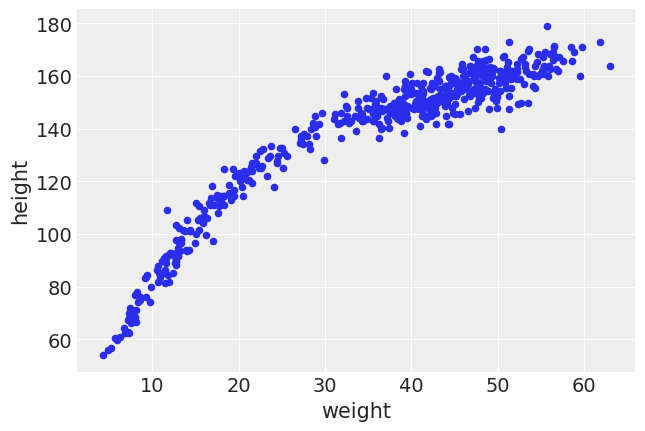

In [32]:
howell.plot(kind="scatter", x="weight", y="height");

By removing the age limit we notice a different trend. At lower weights, a single unit of weight generally corresponds to more height. At higher weights however the height still goes up, but by a lesser amount. There also seems to be more "spread" in the higher weights, than in the lower weights.通过取消年龄限制，我们注意到了不同的趋势。 在较低的重量下，单个重量单位通常对应于更大的高度。 但是，重量较高时，高度仍会增加，但数量会减少。 在较高的权重中似乎比在较低的权重中更“散布”。

Intuitively again this makes sense. Weight is a proxy for age, and when born the variability in height and weight is smaller than for adults. Additionally children tend to grow in both height and weight. Once humans reach adulthood, the height is mostly fixed, and the weight unfortunately changes all too easily.直观上这又是有道理的。 体重是年龄的代表，出生时身高和体重的变异性小于成年人。 另外，儿童往往身高和体重都会增长。 人类成年后，身高基本固定，不幸的是体重也很容易改变。

Another thing to note is the shape of the distribution: it no longer looks linear throughout, but instead looks more like a curve. We could use a square root linear fit, like earlier in the chapter, but we instead will use a logarithmic fit. We will also model the noise term to be correlated with weight, as heights seem to vary more when weights get higher.要注意的另一件事是分布的形状：它在整个过程中不再看起来是线性的，而是看起来更像曲线。 像本章前面一样，我们可以使用平方根线性拟合，但是我们将使用对数拟合。 我们还将对噪声项与体重相关的模型进行建模，因为随着体重的增加，身高似乎变化更大。

In [57]:
with pm.Model() as heights:
    α = pm.Normal("α", sd=10)
    β = pm.Normal("β", sd=10)
    γ = pm.HalfNormal("γ", sd=10)
    δ = pm.HalfNormal("δ", sd=10)
    
    weight_shared = shared(weight.values * 1.)
    
    μ = pm.Deterministic("μ", α+β*tensor.log(weight_shared))
    ϵ = pm.Deterministic("ϵ", γ+δ*weight_shared)
    
    height_pred = pm.Normal("height_pred", mu=μ, sd=ϵ, observed = height)
    trace_heights = pm.sample(tune=2000)
    ppc_heights = pm.sample_posterior_predictive(trace_heights, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [δ, γ, β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 5000/5000 [00:22<00:00, 222.72draws/s]
The acceptance probability does not match the target. It is 0.8854445860805265, but should be close to 0.8. Try to increase the number of tuning steps.
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 574.43it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

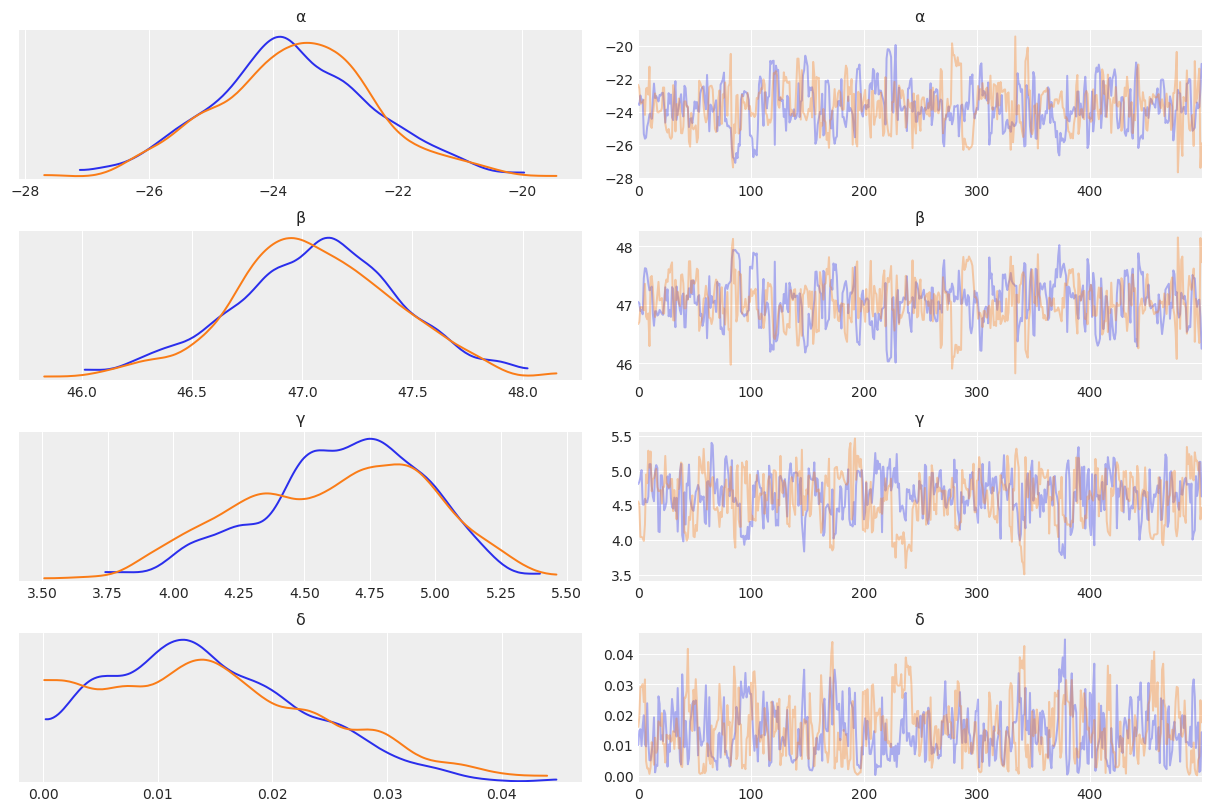

In [58]:
az.plot_trace(trace_heights, var_names = ["α","β", "γ", "δ"]);

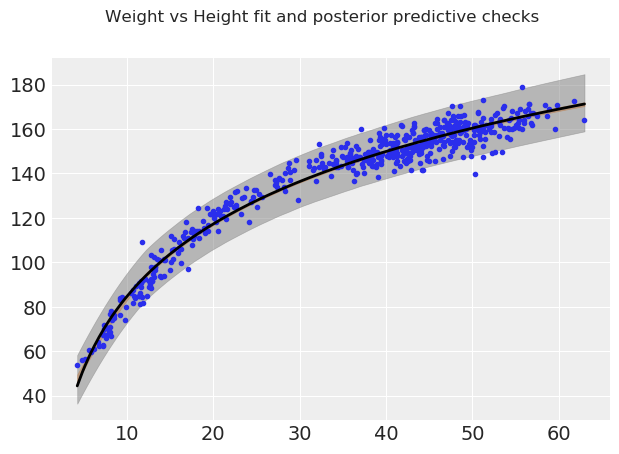

In [60]:
fig, ax = plt.subplots()

ax.plot(weight, height, "C0.")
μ_m = trace_heights["μ"].mean(0)

order = np.argsort(weight)  #返回的是数组值从小到大的索引值 
ax.plot(weight[order], μ_m[order], c="k")
#ax.plot(weight, μ_m, c="k")
az.plot_hpd(weight, trace_heights["μ"], credible_interval=.98)
az.plot_hpd(weight, ppc_heights["height_pred"], credible_interval=.98, color="gray")

fig.suptitle("Weight vs Height fit and posterior predictive checks");

Let's also plot the noise as a function of weight:

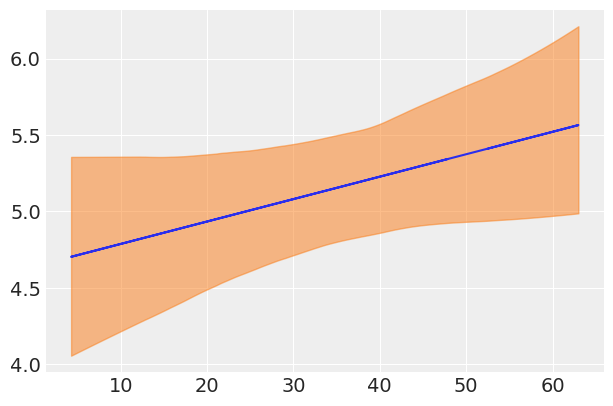

In [38]:
fig, ax = plt.subplots()
ax.plot(weight, trace_heights["ϵ"].mean(0))
az.plot_hpd(weight, trace_heights["ϵ"], credible_interval=.98);

We can see that in lower weight ranges there tends to be less variability in height than for bigger weight ranges (i.e when people are older). This makes sense intuitively, as humans start out roughly the same in their earlier years, and tend to become more different in physical dimensions as they grow older in age and weight.我们可以看到，在较低的体重范围内，身高的变异性往往比较大的体重范围内（即，老年人）更小。 从直觉上讲这是有道理的，因为人类在开始时的年龄大致相同，并且随着年龄和体重的增长，其身体尺寸会变得越来越不同。

## Question 10
***

*It is known that for many species the weight does not scale with the height, but with the logarithm of the weight. Use this information to fit the howell data (including subjects from all ages). Do one more model, this time without using the logarithm but instead a second order polynomial. Compare and explain both results.*众所周知，对于许多物种，重量并不随高度成比例，而是随重量的对数成比例。 使用此信息来拟合Howell数据（包括所有年龄段的受试者）。 再做一个模型，这次不使用对数，而是使用二阶多项式。 比较并解释两个结果。

We did the logarithm bit in the previous exercise, so let's directly fit the model with a 2nd order polynomial that follows this definition:
$$\mu = \alpha + \beta_0*x + \beta_1*x^2$$

Note that we could have used the dot product like in the `model_mlr` example, but in this model we chose to explicitly split out the terms.

In [61]:
with pm.Model() as heights_polynomial:
    α = pm.Normal("α", sd=10)
    β = pm.Normal("β", sd=10, shape=2)
    γ = pm.HalfNormal("γ", sd=10)
    δ = pm.HalfNormal("δ", sd=10)
    
    weight_shared = shared(weight.values * 1.)
    
    μ = pm.Deterministic("μ", α + β[0] * weight_shared + β[1] * weight_shared**2)
    ϵ = pm.Deterministic("ϵ", γ + δ * weight_shared)
    
    height_pred_polynomial = pm.Normal("height_pred", mu=μ, sd=ϵ, observed=height)
    trace_heights_polynomial = pm.sample(tune=2000)
    ppc_heights_polynomial = pm.sample_posterior_predictive(trace_heights_polynomial, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [δ, γ, β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 5000/5000 [00:38<00:00, 130.29draws/s]
The number of effective samples is smaller than 25% for some parameters.
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 604.20it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

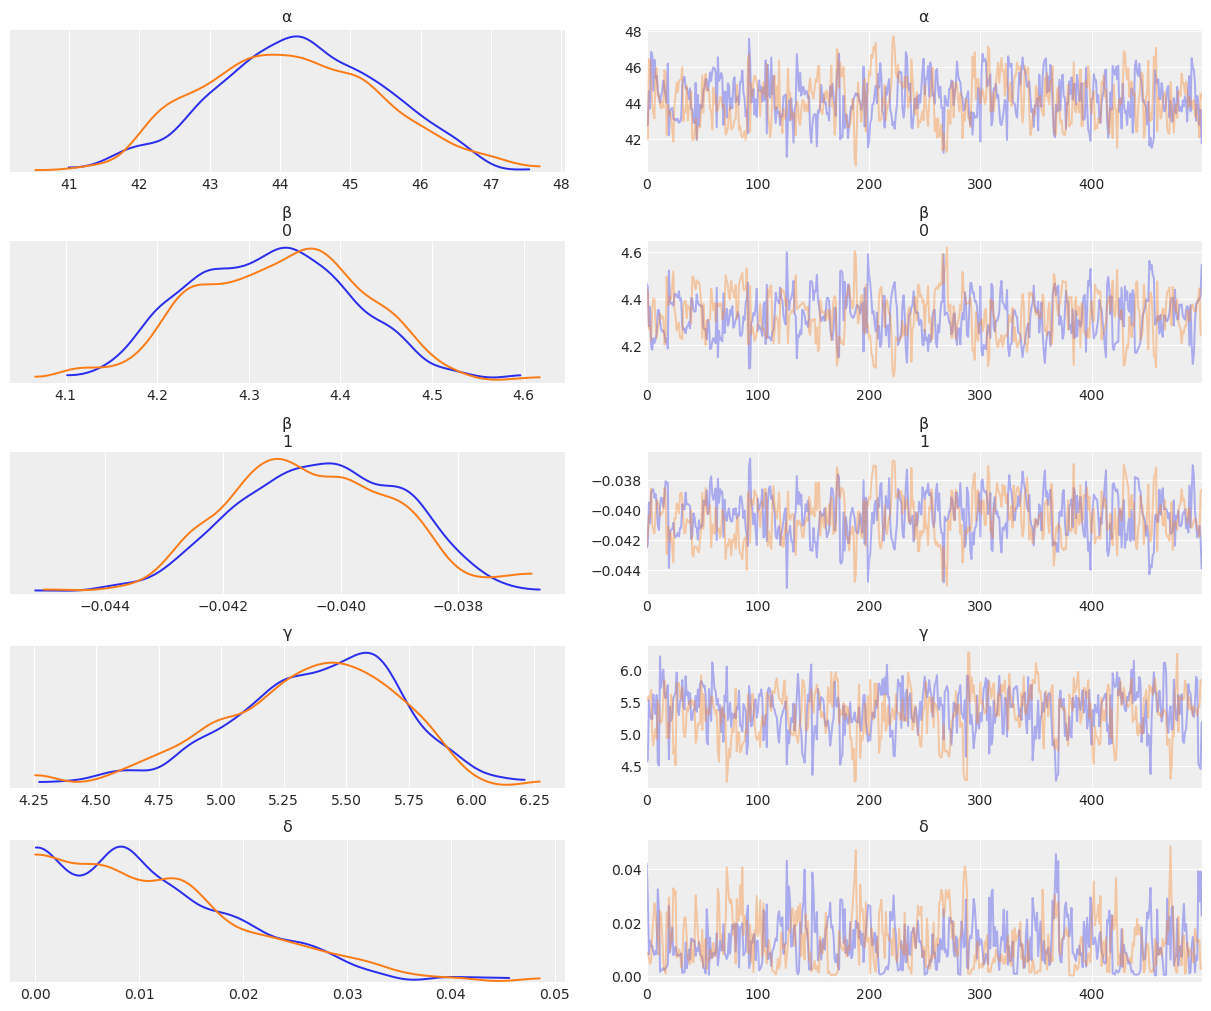

In [62]:
az.plot_trace(trace_heights_polynomial, var_names = ["α","β", "γ", "δ"]);

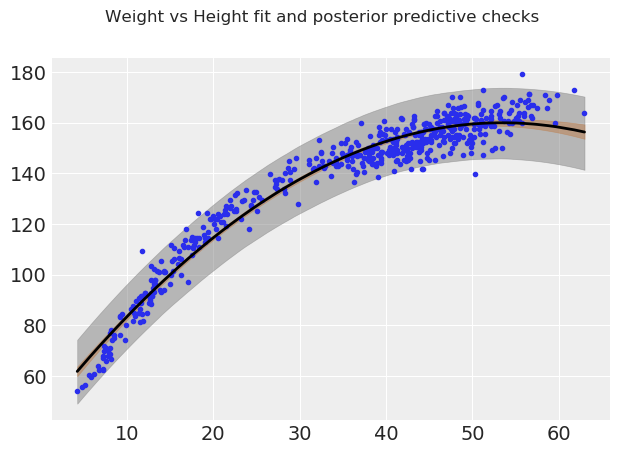

In [64]:
fig, ax = plt.subplots()

ax.plot(weight, height, "C0.")
μ_m = trace_heights_polynomial["μ"].mean(0)
ϵ_m = trace_heights_polynomial["ϵ"].mean(0)
order = np.argsort(weight) 
ax.plot(weight[order], μ_m[order], c="k")
az.plot_hpd(weight, trace_heights_polynomial["μ"], credible_interval=.98)
az.plot_hpd(weight, ppc_heights_polynomial["height_pred"], credible_interval=.98, color="gray")
fig.suptitle("Weight vs Height fit and posterior predictive checks");

For weights up until around ~50 units, the polynomial fit looks good. However past that point the curve starts dropping. Inuitively this does not make sense. This phenonemon is not a property of our data, but of our model choice. Polynomial functions always have to make N-1 turns, where N is the degree of the polynomial. This doesn't necessarily make our model useless, it seems to do a good job in certain parts of the domain, but as a statistical modeler, it's up to you to understand the tools in your toolbox and the tradeoffs of each.对于直到约50个单位的权重，多项式拟合看起来不错。 但是，超过该点时，曲线开始下降。 最初这是没有道理的。 这种现象不是我们数据的属性，而是我们模型选择的属性。 多项式函数总是必须旋转N-1次，其中N是多项式的次数。 这并不一定会使我们的模型失效，它似乎在该领域的某些部分做得很好，但是作为统计建模者，您需要了解工具箱中的工具以及每个工具的取舍。

## Question 11
***

*Think about a model that's able to fit the first three dataset from the Anscombe quartet. Also, think about a model to fit the fourth dataset.*考虑一个能够适合Anscombe四重奏的前三个数据集的模型。 另外，考虑一个适合第四个数据集的模型。

Below are all four datasets from Anscombe's Quartet  
![title](images/640px-Anscombe.png)

A model that might fit the first three models is a polynomial regression of the form:

$ y = \alpha_2  x^2 + \alpha_1 x + \alpha_0 $

For the more linear datasets the model could have a low value for $\alpha_2$, and for the second dataset the model would be able to fit the non linearity.
对于更线性的数据集，该模型的$ \ alpha_2 $值可能较低，而对于第二个数据集，该模型将能够拟合非线性值。

For the last dataset there seems to be two distinct patterns, a cluster of points at x=8 and one at x=19. We could model this one with two groups as follows:对于最后一个数据集，似乎有两种不同的模式，即x = 8处的点簇和x = 19处的点簇。 我们可以用两个组对此模型进行建模，如下所示：

In [65]:
df = pd.read_csv(os.path.join("..", "code", "data", "anscombe.csv"))
df = df.loc[df["group"] == "IV", ["x", "y"]]

In [66]:
idx = (df["x"] == 8).astype(int)
idx

33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    0
41    1
42    1
43    1
Name: x, dtype: int32

In [67]:
df["y"].values

array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
        7.91,  6.89])

In [68]:
with pm.Model() as anscombe:
    
    # Two groups of points with independent parameters
    mu = pm.Normal("mu", sd=10, shape=2)
    sd = pm.HalfNormal("sd", sd=10)
    
    y = pm.Normal("y", mu=mu[idx], sd=sd, observed=df["y"].values)
    
    trace_4 = pm.sample(draws=10000)
    ppc = pm.sample_posterior_predictive(trace_4)

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 2

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

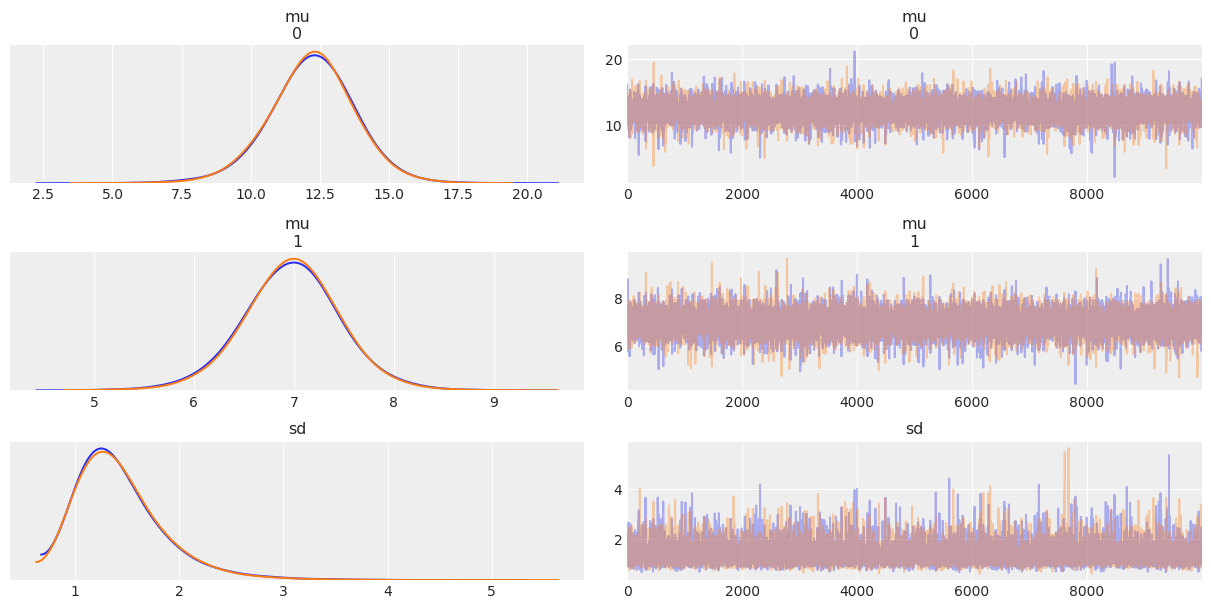

In [69]:
az.plot_trace(trace_4);

## Question 12
***

*See in the code accompanying the book the `model_t2` (and the data associated with it). Experiment with priors for $\nu$, like the non-shifted exponential and gamma priors (they are commented in the code below). Plot the prior distribution, to ensure that you understand them. An easy way to do this is to just comment the likelihood in the model and check the trace plot. A more efficient way though is to use the `pm.sample_prior_predictive()` function instead of `pm.sample()`.*请参阅本书随附的代码中的model_t2（以及与之关联的数据）。 使用prior的先验进行试验，例如非移位指数和伽玛先验（它们在下面的代码中进行了注释）。 绘制先验分布图，以确保您理解它们。 一种简单的方法是在模型中注释可能性并检查迹线图。 但是，更有效的方法是使用pm.sample_prior_predictive（）函数而不是pm.sample（）。

In [61]:
ans = pd.read_csv('../code/data/anscombe.csv')

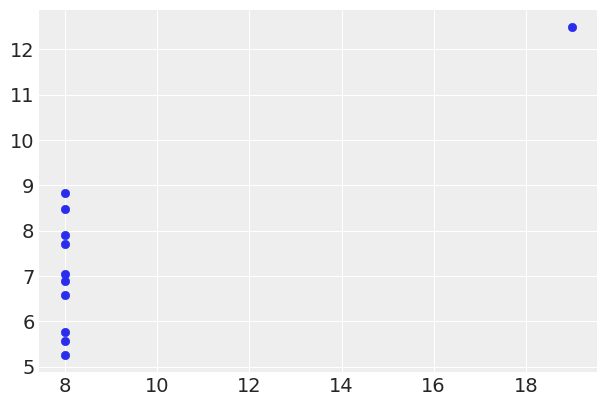

In [64]:
plt.scatter(x_4,y_4)

In [63]:
x_4 = ans[ans.group == 'IV']['x'].values
y_4 = ans[ans.group == 'IV']['y'].values

with pm.Model() as model_t2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    # ν = pm.Gamma('ν', mu=20, sd=15)
    # ν = pm.Gamma('ν', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_4, sd=ϵ, nu=ν, observed=y_4)
    
    prior_v_exp = pm.sample_prior_predictive(2000)
    trace_v_exp = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:09<00:00, 260.33it/s]


In [65]:
data_exp = az.from_pymc3(trace=trace_v_exp, prior=prior_v_exp)

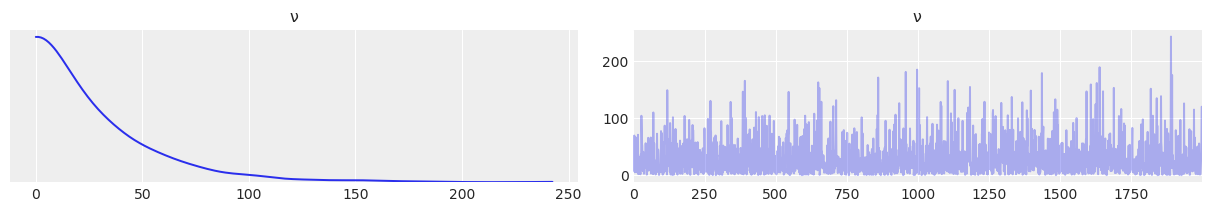

In [66]:
az.plot_trace(data_exp.prior, var_names=["ν"]);

In [68]:
with pm.Model() as model_t2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    # ν = pm.Exponential('ν', 1/30)
    ν = pm.Gamma('ν', mu=20, sd=15)
    #ν = pm.Gamma('ν', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_4, sd=ϵ, nu=ν, observed=y_4)
    
    prior_v20_15 = pm.sample_prior_predictive(2000)
    trace_v_20 = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:09<00:00, 275.61it/s]


In [69]:
data_20 = az.from_pymc3(trace=trace_v_20, prior=prior_v20_15)

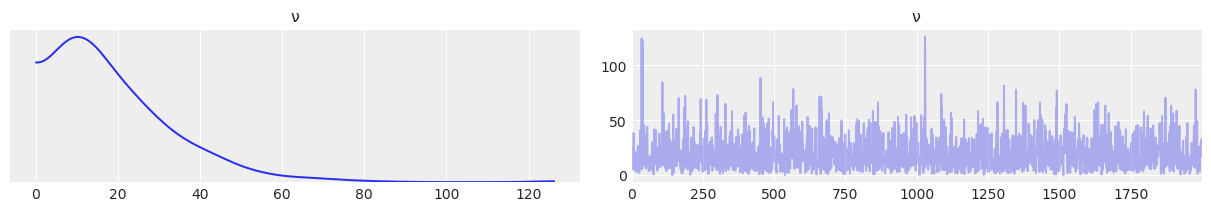

In [70]:
az.plot_trace(data_20.prior, var_names=["ν"]);

In [71]:
with pm.Model() as model_t2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    # ν = pm.Exponential('ν', 1/30)
    # ν = pm.Gamma('ν', mu=20, sd=15)
    ν = pm.Gamma('ν', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_4, sd=ϵ, nu=ν, observed=y_4)
    
    prior_v2_01 = pm.sample_prior_predictive(2000)
    trace_v_2_01 = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, ϵ, β, α]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:09<00:00, 262.84it/s]


In [72]:
data_2 = az.from_pymc3(trace=trace_v_2_01, prior=prior_v2_01)

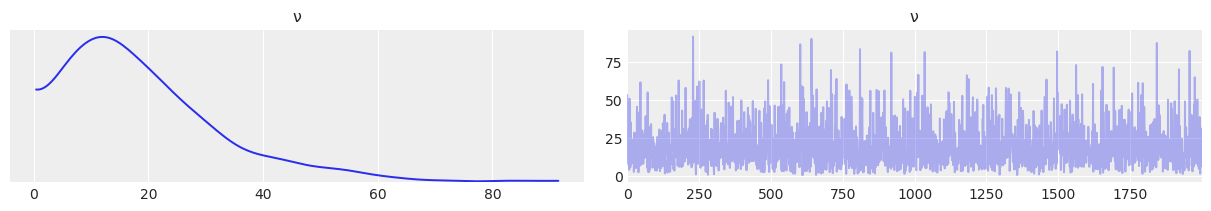

In [73]:
az.plot_trace(data_2.prior, var_names=["ν"]);

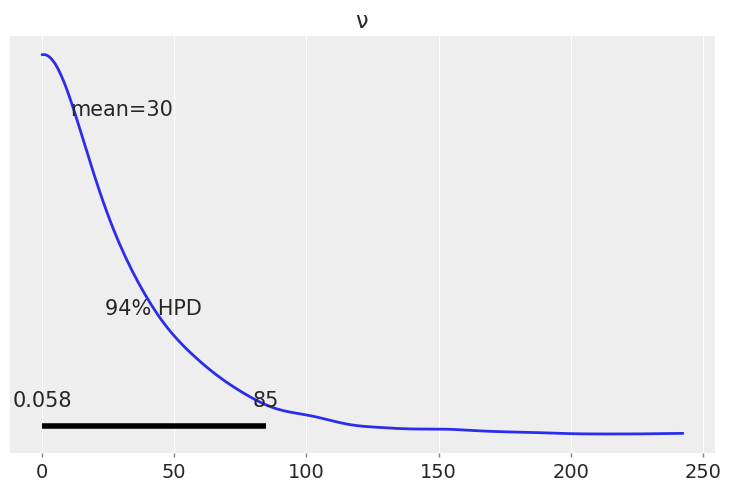

In [74]:
az.plot_posterior(data_exp.prior, var_names=["ν"]);

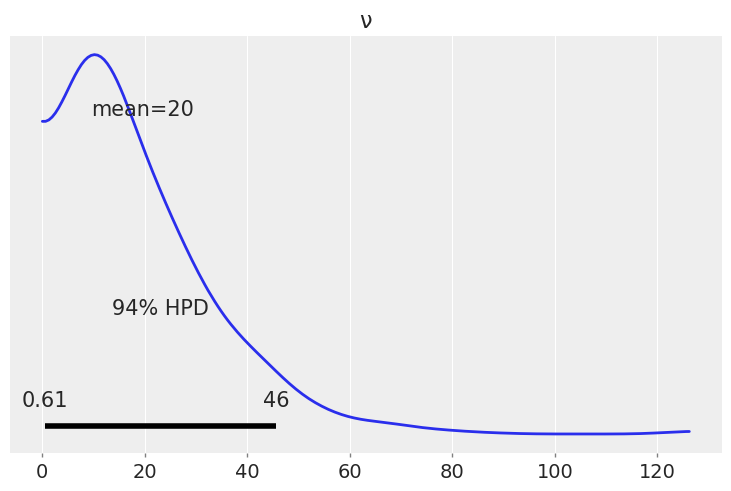

In [75]:
az.plot_posterior(data_20.prior, var_names=["ν"]);

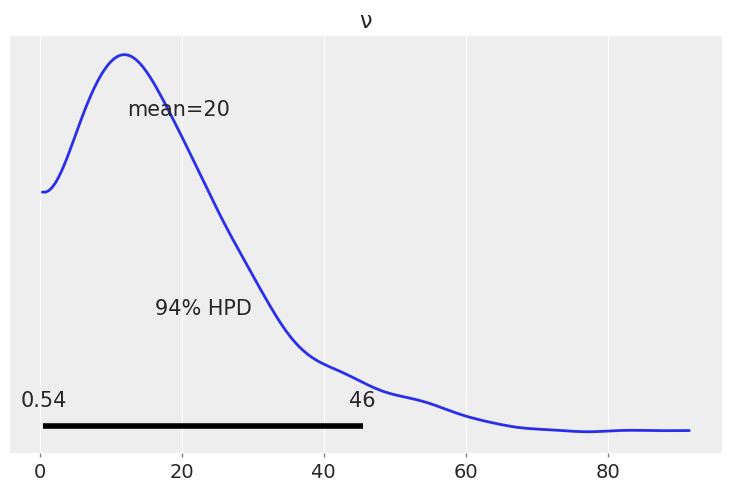

In [76]:
az.plot_posterior(data_2.prior, var_names=["ν"]);

In [77]:
az.summary(trace_v_20)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,3.091,1.441,0.479,5.896,0.036,0.028,1561.0,1342.0,1649.0,1602.0,1.0
β,0.491,0.153,0.207,0.777,0.004,0.003,1612.0,1488.0,1718.0,1493.0,1.0
ϵ,1.394,0.420,0.747,2.166,0.010,0.007,1638.0,1637.0,1506.0,1180.0,1.0
ν,21.718,14.979,1.836,48.521,0.334,0.259,2012.0,1675.0,2109.0,2078.0,1.0


In [78]:
az.summary(trace_v_2_01)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,3.130,1.453,0.385,5.844,0.036,0.026,1603.0,1531.0,1645.0,1482.0,1.0
β,0.484,0.152,0.202,0.782,0.004,0.003,1617.0,1617.0,1665.0,1465.0,1.0
ϵ,1.404,0.437,0.718,2.151,0.012,0.009,1284.0,1284.0,1242.0,1344.0,1.0
ν,21.884,14.417,1.405,47.237,0.330,0.240,1912.0,1808.0,1820.0,1741.0,1.0


In [79]:
az.summary(trace_v_exp)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,3.066,1.407,0.495,5.839,0.034,0.024,1687.0,1687.0,1733.0,1594.0,1.0
β,0.492,0.148,0.213,0.783,0.004,0.003,1720.0,1602.0,1826.0,1581.0,1.0
ϵ,1.383,0.405,0.765,2.147,0.010,0.007,1707.0,1707.0,1660.0,1526.0,1.0
ν,34.787,29.983,0.782,88.561,0.588,0.416,2597.0,2597.0,2088.0,1858.0,1.0


## Question 13
***

*For the `unpooled_model`, change the value of `sd` for the $\beta$ prior. Try values of 1 and 100. Explore how the estimated slopes change for each group. Which group is more affected by this change?*对于unpooled_model，请更改𝛽的sd值。 尝试将值设置为1和100。探索每个组的估计斜率如何变化。 哪个组受此更改的影响更大？

In [80]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real
x_centered = x_m - x_m.mean()

Let's loop through a couple standard deviation values for the slope parameter of each group:

In [82]:
sd_values = [1, 10, 100]
all_traces = {}  #字典

for sd_value in sd_values:
    with pm.Model() as unpooled_model:
        α_tmp = pm.Normal('α_tmp', mu=0, sd=10, shape=M)
        β = pm.Normal('β', mu=0, sd=sd_value, shape=M)
        
        ϵ = pm.HalfCauchy('ϵ', 5)
        ν = pm.Exponential('ν', 1/30)

        y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                             sd=ϵ, nu=ν, observed=y_m)

        α = pm.Deterministic('α', α_tmp - β * x_m.mean())

        unpooled_model_trace = pm.sample(2000,cores=1)
        all_traces[sd_value] = unpooled_model_trace   #字典收值

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, ϵ, β, α_tmp]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:08<00:00, 289.44it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, ϵ, β, α_tmp]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:12<00:00, 195.59it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, ϵ, β, α_tmp]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 2500/2500 [00:18<00:00, 135.48it/s]


In [87]:
all_traces[10]

<MultiTrace: 2 chains, 2000 iterations, 7 variables>

In [88]:
all_summaries = []
for sd, trace in all_traces.items():
    summary = az.summary(az.from_pymc3(trace=trace))
    summary["group"] =  f"sd_{sd}"
    summary.reset_index(inplace=True)
    #summary. = summary.index +
    all_summaries.append(summary)
    
summaries_df = pd.concat(all_summaries)

In [89]:
beta = summaries_df[summaries_df["index"].str.contains("β")]
beta = beta[["group", "mean","index"]]

In [90]:
summaries_df[summaries_df["index"].str.contains("β")]

,index,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat,group
8,β[0],0.889,0.076,0.754,1.037,0.001,0.001,9525.0,9411.0,9457.0,3054.0,1.0,sd_1
9,β[1],0.868,0.114,0.651,1.080,0.001,0.001,9612.0,8840.0,9640.0,2740.0,1.0,sd_1
10,β[2],0.587,0.124,0.365,0.817,0.001,0.001,8509.0,7920.0,8443.0,3069.0,1.0,sd_1
11,β[3],0.697,0.088,0.526,0.856,0.001,0.001,10198.0,9398.0,10203.0,2443.0,1.0,sd_1
12,β[4],0.857,0.129,0.618,1.100,0.001,0.001,8695.0,8437.0,8660.0,3081.0,1.0,sd_1
13,β[5],0.669,0.102,0.470,0.850,0.001,0.001,9805.0,9349.0,9773.0,2899.0,1.0,sd_1
14,β[6],0.976,0.090,0.806,1.139,0.001,0.001,6219.0,6184.0,6233.0,3157.0,1.0,sd_1
15,β[7],0.002,0.983,-1.757,1.880,0.010,0.018,9443.0,1494.0,9382.0,3015.0,1.0,sd_1
8,β[0],0.894,0.078,0.745,1.037,0.001,0.001,6848.0,6713.0,6832.0,2624.0,1.0,sd_10
9,β[1],0.879,0.116,0.661,1.097,0.001,0.001,9465.0,8911.0,9477.0,3040.0,1.0,sd_10


In [91]:
beta

,group,mean,index
8,sd_1,0.889,β[0]
9,sd_1,0.868,β[1]
10,sd_1,0.587,β[2]
11,sd_1,0.697,β[3]
12,sd_1,0.857,β[4]
13,sd_1,0.669,β[5]
14,sd_1,0.976,β[6]
15,sd_1,0.002,β[7]
8,sd_10,0.894,β[0]
9,sd_10,0.879,β[1]


In [91]:
beta_p = beta.pivot(index="group", columns="index")
beta_p.columns = beta_p.columns.droplevel(0)
beta_p.reset_index(inplace=True)
beta_p

index,group,β[0],β[1],β[2],β[3],β[4],β[5],β[6],β[7]
0,sd_1,0.889,0.868,0.585,0.696,0.859,0.671,0.977,0.010
1,sd_10,0.893,0.877,0.597,0.699,0.872,0.678,0.986,0.039
2,sd_100,0.894,0.880,0.596,0.701,0.871,0.678,0.985,11.219


In [ ]:
主要解决了在多维（大于三维）情况下数据特征无法可视化的问题。图种每个竖线代表一个特征，上面的点代表该特征的值，每个样本表示出来就是一个贯穿所有竖线的折线图。

一般来说，用不同的颜色代表不同的类别，这样可以方便的看出不同特征对分类的影响。

有以下两个原则;

主要看相同颜色的折线是否集中，若在某个属性上相同颜色折线较为集中，不同颜色有一定的间距，则说明该属性对于预测标签类别有较大的帮助.
若某个属性上线条混乱，颜色混杂，则较大可能该属性对于标签类别判定没有价值.

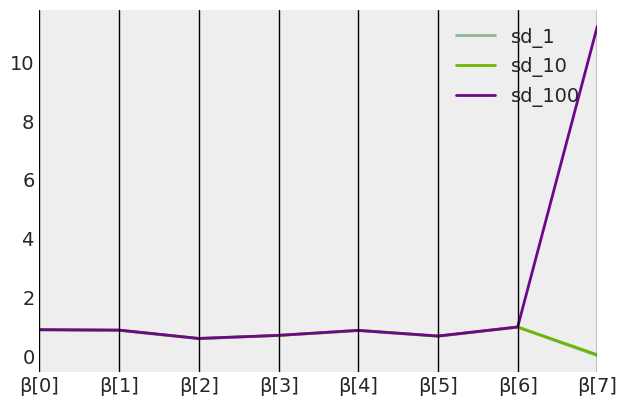

In [92]:
parallel_coordinates(beta_p, "group")

As we increase the standard deviation of the beta prior (the slope parameter), we see that for most of the groups the effect is neglible. However, for group 7 the prior has a strong effect on the posterior estimation because group 7 only has one data point and the unpooled model doesn't consider the datapoints in the other groups. There simply isn't enough data to "wash out" the prior distribution in this case.
414/5000
随着我们增加beta优先级的标准偏差（斜率参数），我们看到对于大多数组而言，效果可忽略不计。 但是，对于第7组，先验对后验估计有很大的影响，因为第7组只有一个数据点，而非池化模型则不考虑其他组中的数据点。 在这种情况下，根本没有足够的数据来“冲销”先验的分布

## Question 14
***

*Using the model `hierarchical_model`, repeat Figure 3.18, the one with the eight groups and the eight lines, but this time add the uncertainty to the linear fit.*Using the model hierarchical_model, repeat Figure 3.18, the one with the eight groups and the eight lines, but this time add the uncertainty to the linear fit.

In [4]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

with pm.Model() as hierarchical_model:
    # hyper-priors
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=0, sd=10)
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 10)
    β_μ = pm.Normal('β_μ', mu=0, sd=10)
    β_σ = pm.HalfNormal('β_σ', sd=10)

    # priors
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sd=α_σ_tmp, shape=M)
    β = pm.Normal('β', mu=β_μ, sd=β_σ, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)

    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)

    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    α_μ = pm.Deterministic('α_μ', α_μ_tmp - β_μ * x_m.mean())
    α_σ = pm.Deterministic('α_sd', α_σ_tmp - β_μ * x_m.mean())

    trace_hm = pm.sample(1000,cores=1,target_accept=0.9)
    ppc_lines = pm.sample_posterior_predictive(trace_hm, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, ϵ, β, α_tmp, β_σ, β_μ, α_σ_tmp, α_μ_tmp]
Sampling chain 1, 1 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:11<00:00, 131.27it/s]
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 185.09it/s]


In [5]:
trace_hm.get_values("α").shape

(2000, 8)

In [6]:
alpha = trace_hm.get_values("α")[369, 1]
beta = trace_hm.get_values("β")[369, 1]

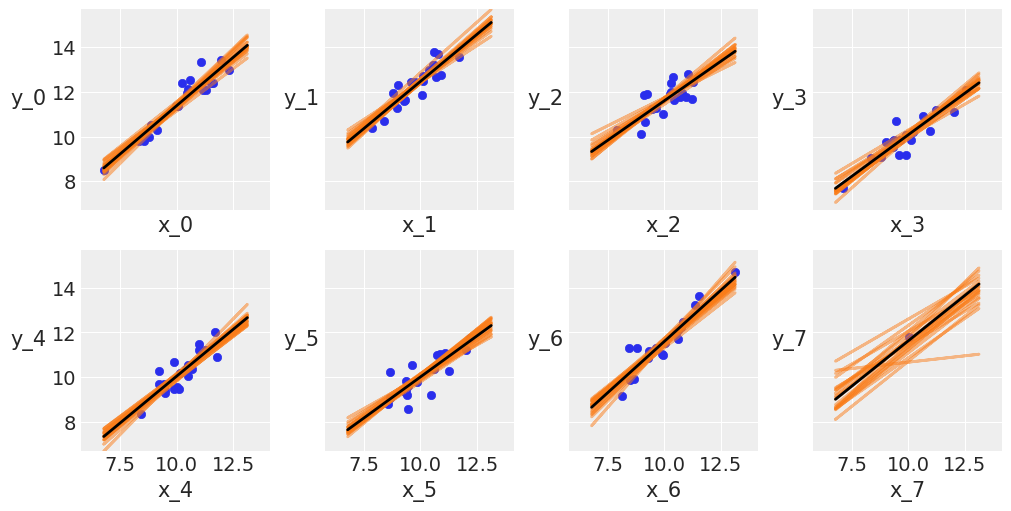

In [7]:
# Get 20 random samples for chain
chain_length =1000
random_draws = np.random.randint(0, chain_length-1, 20)

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    
    #We add this one line to plot uncertainty. At least two data points must be present in group
    for random_draw in random_draws:
        alpha = trace_hm.get_values("α")[random_draw, i]
        beta = trace_hm.get_values("β")[random_draw, i]
        ax[i].plot(x_m, alpha + beta*x_m, 'C1-', alpha=0.5)
        # ax[i].plot(x_m, alpha + beta*x_m)

    
    alpha_m = trace_hm['α'][:, i].mean()
    beta_m = trace_hm['β'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N

## Question 15
***

*Re-run the `model_mlr` example, this time without centering the data. Compare the uncertainty in the $\alpha$ parameter for one case and the other. Can you explain these results?*重新运行model_mlr示例，这一次不将数据居中。 比较一种情况和另一种情况下𝛼参数的不确定性。 您能解释这些结果吗？

*Tip: Remember the definition of the $\alpha$ parameter (also known as the intercept).*

In [96]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
# X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

In [99]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α_tmp + pm.math.dot(X, β)

    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_mlr = pm.sample(2000,cores=1,tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α_tmp]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 4000/4000 [00:32<00:00, 122.14it/s]


In [100]:
az.summary(trace_mlr)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α_tmp,1.841,0.448,1.002,2.682,0.011,0.008,1528.0,1500.0,1532.0,1766.0,1.0
β[0],0.970,0.043,0.888,1.051,0.001,0.001,1563.0,1563.0,1572.0,1824.0,1.0
β[1],1.470,0.032,1.412,1.531,0.001,0.000,2934.0,2933.0,2938.0,2448.0,1.0
ϵ,0.474,0.035,0.410,0.539,0.001,0.001,2258.0,2230.0,2274.0,2012.0,1.0
α[0],-10.917,0.892,-12.599,-9.243,0.023,0.016,1522.0,1522.0,1526.0,1769.0,1.0


In [15]:
az.summary(trace_mlr, var_names=['α', 'β', 'ϵ'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α[0],-10.885,0.908,-12.545,-9.129,0.024,0.017,1460.0,1451.0,1460.0,1750.0,1.0
β[0],0.968,0.044,0.882,1.048,0.001,0.001,1493.0,1486.0,1493.0,1817.0,1.0
β[1],1.470,0.033,1.410,1.531,0.001,0.000,2723.0,2719.0,2720.0,2312.0,1.0
ϵ,0.474,0.035,0.407,0.538,0.001,0.000,2618.0,2618.0,2592.0,1984.0,1.0


With the non-centered data, $\alpha$ changes to compensate for the position of the points. In other words, $\alpha$ needs to compensate $\beta X$ distance up or down since the $X$ values are no longer centered around the $y$ axis.对于非中心数据，𝛼更改以补偿点的位置。 换句话说，由于𝑋值不再围绕𝑦轴居中，因此𝛼需要向上或向下补偿𝛽𝑋距离。本例子中，α_tmp即是正常的数据。

In [98]:
with pm.Model() as model_mlr1:
    a = pm.Normal('a', mu=0, sd=10)
    b = pm.Normal('b', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)


    μ = pm.Deterministic('μ', a+ pm.math.dot(X, b))

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_mlr1 = pm.sample(2000,cores=1,tune=2000)
az.summary(trace_mlr1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, b, a]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 4000/4000 [00:29<00:00, 136.14it/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,1.856,0.456,1.029,2.750,0.012,0.008,1466.0,1466.0,1467.0,1726.0,1.0
b[0],0.968,0.044,0.882,1.048,0.001,0.001,1493.0,1486.0,1493.0,1817.0,1.0
b[1],1.470,0.033,1.410,1.531,0.001,0.000,2723.0,2719.0,2720.0,2312.0,1.0
ϵ,0.474,0.035,0.407,0.538,0.001,0.000,2618.0,2618.0,2592.0,1984.0,1.0
μ[0],16.677,0.065,16.550,16.791,0.001,0.001,3169.0,3169.0,3168.0,3208.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
μ[95],15.229,0.058,15.116,15.334,0.001,0.001,3073.0,3073.0,3088.0,2624.0,1.0
μ[96],11.988,0.120,11.782,12.230,0.002,0.002,2808.0,2805.0,2813.0,2856.0,1.0
μ[97],12.173,0.110,11.974,12.393,0.003,0.002,1651.0,1651.0,1657.0,1704.0,1.0
μ[98],13.683,0.062,13.566,13.797,0.001,0.001,3419.0,3417.0,3429.0,3340.0,1.0


## Question 16
***

*Read and run [this notebook](https://docs.pymc.io/notebooks/LKJ.html) from PyMC3's documentation*

### 多元正态模型的LKJ Cholesky协方差先验

虽然Wishart逆分布是多元正态分布协方差矩阵的共轭先验，但它并不十分适合现代贝叶斯计算方法。 因此，在对多元正态分布的协方差矩阵建模时，建议使用LKJ先验。

为了说明与LKJ分布的建模协方差，我们首先生成一个二维正态分布的样本数据集。

再看numpy提供的函数的参数：multivariate_normal(mean, cov, size=None, check_valid=None, tol=None)在一维正太分布中，第一个参数mean就是这里的均值μ，第二个参数cov就是方差【公式Cov(X，X)=D(X)，这里只是猜测】，第三个参数size就是生成的正态分布矩阵的维度

![title](e_1.png)

![title](e_2.png)

![title](e_3.png)

In [13]:
from warnings import filterwarnings
from matplotlib.patches import Ellipse
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import seaborn as sns
%matplotlib inline
filterwarnings('ignore', message='findfont')
SEED = 3264602 # from random.org

np.random.seed(SEED)
N = 10000

μ_actual = np.array([1, -2])
Σ_actual = np.array([[0.5, -0.3],
                     [-0.3, 1.]])

x = np.random.multivariate_normal(μ_actual, Σ_actual, size=N)

In [17]:
x[0,:]

array([ 0.0617816 , -1.44326977])

In [3]:
var, U = np.linalg.eig(Σ_actual)   #w：特征值。*v：特征向量。
angle = 180. / np.pi * np.arccos(np.abs(U[0, 0]))

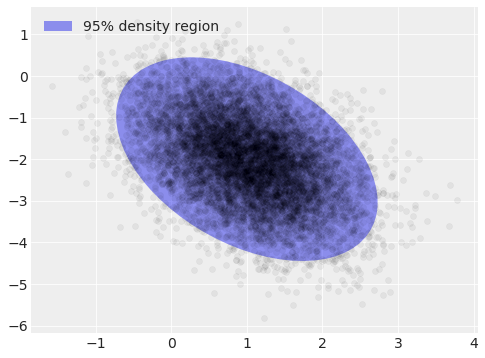

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

blue, _, red, *_ = sns.color_palette()

e = Ellipse(μ_actual, 2 * np.sqrt(5.991 * var[0]),
            2 * np.sqrt(5.991 * var[1]),
            angle=angle)
e.set_alpha(0.5)
e.set_facecolor(blue)
e.set_zorder(10);
ax.add_artist(e);

ax.scatter(x[:, 0], x[:, 1], c='k', alpha=0.05, zorder=11);

rect = plt.Rectangle((0, 0), 1, 1, fc=blue, alpha=0.5)
ax.legend([rect], ['95% density region'], loc=2);

The sampling distribution for the multivariate normal model is x∼N(μ,Σ), where Σ is the covariance matrix of the sampling distribution, with Σij=Cov(xi,xj). The density of this distribution is 多元正态模型的采样分布为x〜N（μ，Σ），其中Σ为采样分布的协方差矩阵，其中Σij= Cov（xi，xj）。 该分布的密度为

f(x | μ,$Σ^{−1}$)=$(2π)^{−\frac {k}{2}}$$|Σ|^{−\frac12}$exp(${−\frac12}$$(x−μ)^⊤Σ^{−1}$(x−μ)).

The LKJ distribution provides a prior on the correlation matrix, C=Corr(xi,xj), which, combined with priors on the standard deviations of each component, induces a prior on the covariance matrix, Σ. Since inverting Σ is numerically unstable and inefficient, it is computationally advantageous to use the Cholesky decompositon of Σ, Σ=LL⊤, where L is a lower-triangular matrix. This decompositon allows computation of the term (x−μ)⊤Σ−1(x−μ) using back-substitution, which is more numerically stable and efficient than direct matrix inversion.LKJ分布在相关矩阵C = Corr（xi，xj）上提供了先验，再与每个分量的标准偏差的先验相结合，在协方差矩阵Σ上得出先验。 由于对Σ进行数值上的不稳定和效率低下，因此使用Σ的Cholesky分解在计算上是有利的，Σ=LL⊤，其中L是下三角矩阵。 该分解允许使用逆置换来计算项（x-μ）⊤Σ-1（x-μ），这比直接矩阵求逆在数值上更稳定，更高效。

PyMC3 supports LKJ priors for the Cholesky decomposition of the covariance matrix via the LKJCholeskyCov distribution. This distribution has parameters n and sd_dist, which are the dimension of the observations, x, and the PyMC3 distribution of the component standard deviations, repsectively. It also has a hyperparamter eta, which controls the amount of correlation between components of x. The LKJ distribution has the density f(C | η)∝|C|η−1, so η=1 leads to a uniform distribution on correlation matrices, while the magnitude of correlations between components decreases as η→∞.PyMC3支持通过LKJCholeskyCov分布对协方差矩阵进行Cholesky分解的LKJ先验。 此分布具有参数n和sd_dist，分别是观测值x和分量标准偏差的PyMC3分布。 它还具有一个超参数eta，它控制x分量之间的相关量。 LKJ分布具有密度f（C |η）∝ | C |η-1，因此η= 1导致相关矩阵上的均匀分布，而分量之间的相关程度则随着η→∞而减小。

In this example, we model the standard deviations with HalfCauchy(2.5) priors, and the correlation matrix as C∼LKJ(η=2).

In [5]:
with pm.Model() as model:
    packed_L = pm.LKJCholeskyCov('packed_L', n=2,
                                 eta=2., sd_dist=pm.HalfCauchy.dist(2.5))

由于Σ的Cholesky分解是较低的三角形，因此LKJ Cholesky Cov仅存储对角线和次对角线项以提高效率。

In [6]:
packed_L.tag.test_value.shape

(3,)

我们使用expand_packed_triangular将此向量转换为下三角矩阵L，该矩阵出现在Cholesky分解Σ= LL =中。

In [7]:
with model:
    L = pm.expand_packed_triangular(2, packed_L)
    Σ = pm.Deterministic('Σ', L.dot(L.T))

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [8]:
L.tag.test_value.shape

(2, 2)

为了完善我们的模型规范，我们将独立的，模糊的正态先验μi〜N（0,102）放在μ的分量上。
Multivariate normal log-likelihood  
MvNormal(mu[, cov, tau, chol, lower])  Cholesky decomposition of covariance matrix. Exactly one of cov, tau, or chol is needed.

In [9]:
with model:
    μ = pm.Normal('μ', 0., 10., shape=2,
                  testval=x.mean(axis=0))
    obs = pm.MvNormal('obs', μ, chol=L, observed=x)

In [10]:
with model:
    trace = pm.sample(random_seed=SEED, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; u

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

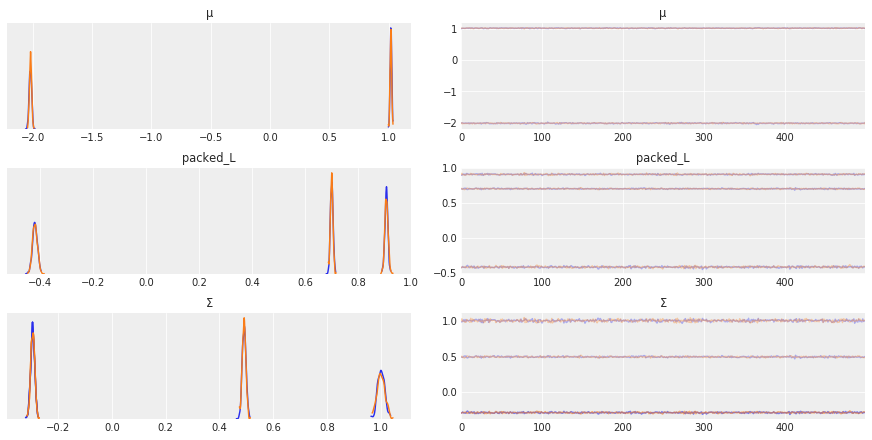

In [11]:
pm.traceplot(trace);

In [12]:
max(np.max(gr_stats) for gr_stats in pm.gelman_rubin(trace).values())

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\stats\__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


<xarray.DataArray 'μ' ()>
array(1.01026539)

We see that the posterior expected value of the each component of μ and Σ is within 2% of the true value.

In [18]:
μ_post = trace['μ'].mean(axis=0)
1 - μ_post / μ_actual

array([-0.01854992, -0.00916851])

In [19]:
Σ_post = trace['Σ'].mean(axis=0)
1 - Σ_post / Σ_actual

array([[ 0.01670009,  0.01658972],
       [ 0.01658972, -0.00164974]])

The following plot also shows excellent visual agreement between the true distribution and the posterior distribution.

In [20]:
var_post, U_post = np.linalg.eig(Σ_post)
angle_post = 180. / np.pi * np.arccos(np.abs(U_post[0, 0]))

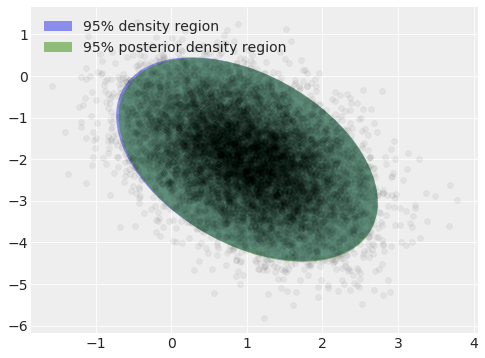

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

e = Ellipse(μ_actual, 2 * np.sqrt(5.991 * var[0]),
            2 * np.sqrt(5.991 * var[1]),
            angle=angle)
e.set_alpha(0.5)
e.set_facecolor(blue)
e.set_zorder(10);
ax.add_artist(e);

e_post = Ellipse(μ_post, 2 * np.sqrt(5.991 * var_post[0]),
                 2 * np.sqrt(5.991 * var_post[1]),
                 angle=angle_post)
e_post.set_alpha(0.5)
e_post.set_facecolor(red)
e_post.set_zorder(10);
ax.add_artist(e_post);

ax.scatter(x[:, 0], x[:, 1], c='k', alpha=0.05, zorder=11);

rect = plt.Rectangle((0, 0), 1, 1, fc=blue, alpha=0.5)
rect_post = plt.Rectangle((0, 0), 1, 1, fc=red, alpha=0.5)
ax.legend([rect, rect_post],
          ['95% density region',
           '95% posterior density region'],
          loc=2);

## Question 17
***

*Choose a dataset that you find interesting and use it with the simple linear regression model. Be sure to explore the results using ArviZ functions and compute the Pearson correlation coefficient. If you do not have an interesting dataset, try searching online, for example [here](https://data.worldbank.org/) or [there](http://users.stat.ufl.edu/~winner/datasets.html).*